# COSTRUIRE GRAFI

In [3]:
import networkx as nx
import pandas as pd

## ESERCIZIO 1

In [6]:
books = range(1,6)
for book in books:
    print(f"Processing book: {book}")
    nodes_df = pd.read_csv(f"data/asoiaf/asoiaf-book{book}-nodes.csv")
    edges_df = pd.read_csv(f"data/asoiaf/asoiaf-book{book}-edges.csv")
    game_of_graphs = nx.Graph()
    for index, row in nodes_df.iterrows():
        game_of_graphs.add_node(row["Id"], label=row['Label'])
    for index, row in edges_df.iterrows():
        game_of_graphs.add_edge(row["Source"], row["Target"], weight=row['weight'], book=row["book"])
    nx.write_gpickle(game_of_graphs, f"data/game_of_graphs_book{book}.pkl")

Processing book: 1
Processing book: 2
Processing book: 3
Processing book: 4
Processing book: 5


## ESERCIZIO 2

In [12]:
nodes_df = pd.read_csv("data/asoiaf/asoiaf-all-nodes.csv")
edges_df = pd.read_csv("data/asoiaf/asoiaf-all-edges.csv")
game_of_graphs = nx.Graph()
for index, row in nodes_df.iterrows():
    if "Stark" in row["Id"]:
        game_of_graphs.add_node(row["Id"], label=row['Label'])
for index, row in edges_df.iterrows():
    if "Stark" in row["Source"] and "Stark" in row["Target"]:
        game_of_graphs.add_edge(row["Source"], row["Target"], weight=row['weight'], id=row["id"])
print(game_of_graphs.nodes())
print(game_of_graphs.edges())
print(game_of_graphs.number_of_nodes())
print(game_of_graphs.number_of_edges())
nx.write_gpickle(game_of_graphs, "data/game_of_graphs_Stark.pkl")

['Arya-Stark', 'Benjen-Stark', 'Bran-Stark', 'Brandon-Stark', 'Catelyn-Stark', 'Eddard-Stark', 'Lyanna-Stark', 'Rickard-Stark', 'Rickon-Stark', 'Robb-Stark', 'Sansa-Stark', 'Torrhen-Stark']
[('Arya-Stark', 'Benjen-Stark'), ('Arya-Stark', 'Bran-Stark'), ('Arya-Stark', 'Catelyn-Stark'), ('Arya-Stark', 'Eddard-Stark'), ('Arya-Stark', 'Rickon-Stark'), ('Arya-Stark', 'Robb-Stark'), ('Arya-Stark', 'Sansa-Stark'), ('Benjen-Stark', 'Bran-Stark'), ('Benjen-Stark', 'Robb-Stark'), ('Bran-Stark', 'Catelyn-Stark'), ('Bran-Stark', 'Eddard-Stark'), ('Bran-Stark', 'Rickard-Stark'), ('Bran-Stark', 'Rickon-Stark'), ('Bran-Stark', 'Robb-Stark'), ('Bran-Stark', 'Sansa-Stark'), ('Brandon-Stark', 'Eddard-Stark'), ('Brandon-Stark', 'Lyanna-Stark'), ('Brandon-Stark', 'Rickard-Stark'), ('Brandon-Stark', 'Rickon-Stark'), ('Brandon-Stark', 'Robb-Stark'), ('Catelyn-Stark', 'Eddard-Stark'), ('Catelyn-Stark', 'Rickon-Stark'), ('Catelyn-Stark', 'Robb-Stark'), ('Catelyn-Stark', 'Sansa-Stark'), ('Eddard-Stark', 'Lyann

# DISEGNARE GRAFI

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

## ESERCIZIO 1

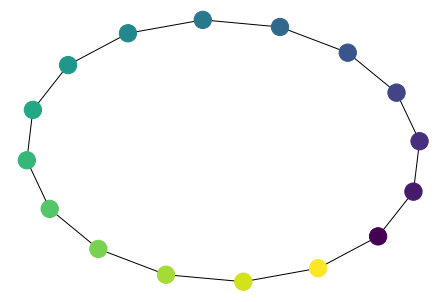

In [3]:
N = 16
G = nx.cycle_graph(N)
pos = nx.spring_layout(G, iterations=200)
nx.draw(G, pos, node_color=range(N))
plt.show()

## ESERCIZIO 2

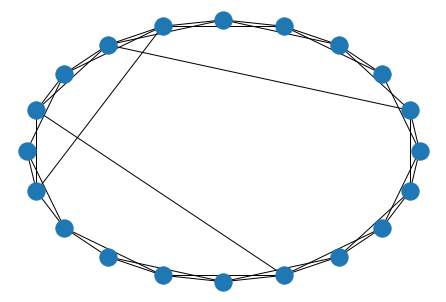

In [4]:
G = nx.watts_strogatz_graph(20, 4, 0.2)
pos = nx.shell_layout(G)
nx.draw(G, pos)
plt.show()

## ESERCIZIO 3

In [14]:
from pyvis.network import Network
game_of_graphs = nx.read_gpickle("data/game_of_graphs_Stark.pkl")
nt = Network(
    height="100%", 
    width="100%", 
    bgcolor="#222222", 
    font_color="white",
    heading="Game of Graphs - Stark Edition"
)
nt.barnes_hut()
nt.from_nx(game_of_graphs)
neighbor_map = nt.get_adj_list()
for node in nt.nodes:
    node["value"] = len(neighbor_map[node["id"]])
nt.show("game_of_graphs_Stark.html")